In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,re
sys.path.append("../shared/utilsGRF/")
import AnalyseBoundarysearch
from shutil import copyfile
sys.path.append("./scripts")
sys.path.append("./cflinux/")
sys.path.append("./cfmac/")
import pandas as pd
import BoundaryFinder as BF
import matplotlib as mpl
import PolAB_A_allpars

In [2]:


def compute_syn(parset):
    mstars=[]
    
    for i in range(4):
        if i==0:
            A=0.0
            B=0.0
        elif i==1:
            A=2.0
            B=0.0
        elif i==2:
            A=0.0
            B=2.0
        else:
            A=1.0
            B=1.0
        m=GRFA(parset2.copy(),np.array([B]),A) #in some cases I have observed weird behaviour if the array is passed multiple times so it is safest to copy. 
        mstars.append(m)
    if mstars[1]>mstars[2]:
        r=(mstars[1]/mstars[2])
    else:
        print("wrong A-B")
        return [None,None]
    
    result=[np.log2(mstars[3]/mstars[1]),np.log2(mstars[3]/mstars[2])]
    return result

In [3]:
#check
allcases=["any","difAD_difbnp","difAD_samebnp","difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11","sameAD_difbp","sameAD_difbp_kuonly","sameAD_difbnp","empty"]
cols_basal=["ktia0","ktan0","ktni0","ktin0"]
cols_A=["ktiaA","ktanA","ktniA","ktinA"]
cols_B=["ktiaB","ktanB","ktniB","ktinB"]
cols_bA=["kbAn","kbAi","kbAa","kuAn","kuAi","kuAa"]
cols_bB=["kbBn","kbBi","kbBa","kuBn","kuBi","kuBa"]
for case in allcases:
    df=pd.read_pickle("2020_03_15_kPolconstr1000_%s.df"%case)
    basal=df[cols_basal].values
    A=df[cols_A].values
    B=df[cols_B].values
    
    #first check that fc up and down is correct
    for X in [A,B]:
        non1000X=np.sum((X[:,:3]/basal[:,:3])>1000.0001)
        if non1000X>0:
            print("wrong")
        else:
            print("1000X",end=",")
    for X in [A,B]:
        nonlow=np.sum((X[:,-1]/basal[:,-1])>1.00001)
        nonlow1000=np.sum((X[:,-1]/basal[:,-1])<0.0009)
        if nonlow>0:
            print("wrong nonlow")
        if nonlow1000>0:
            print("wrong nonlow1000")
        else:
            print("low1000",end=",")
    print(" ")
    
    #then check that the conditions of each case are fulfilled
    if "sameAD" in case:
        print("sameAD", np.all((A/B)==1))
    if "sameb" in case:
        bA=df[cols_bA].values
        bB=df[cols_bB].values
        print("sameB",np.all(bA/bB)==1)
    
    #for those where there is only action at particular steps, check that it is correct
    if "step" in case:
        steps=case[-2:]
        if steps=="12":
            idx1=2
            idx2=0
        elif steps=="13":
            idx1=2
            idx2=1
        elif steps=="23":
            idx1=0
            idx2=1
        print(case,steps,idx1,idx2)
        
        A1=(A[:,idx1]/basal[:,idx1])
        B1=(B[:,idx1]/basal[:,idx1])
        A2=(A[:,idx2]/basal[:,idx2])
        B2=(B[:,idx2]/basal[:,idx2])
        for r in range(len(df)):
            actionA1=np.abs(A1[r]-1)>0.001
            actionB1=np.abs(B1[r]-1)>0.001
            actionA2=np.abs(A2[r]-1)>0.001
            actionB2=np.abs(B2[r]-1)>0.001
            if (actionA1 and actionB1) or (actionA2 and actionB2):
                print("wrong ",A1[r],B1[r],A2[r],B2[r])
            else:
                #print(".",end=',')
                #print("correct",actionA1,actionA2)
                if actionA1:
                    compareidx=idx1
                elif actionA2:
                    compareidx=idx2
                else:
                    compareidx=-1
                if compareidx>-1:
                    for idx in range(3):
                        if idx!=compareidx:
                            #print("comparingA")
                            if np.sum(np.abs((A[r,idx]/basal[r,idx])-1)>0.001)>0:
                                print("wrong others A")
                            #else:
                            #    print(idx,end=",")
                if actionB1:
                    compareidx=idx1
                elif actionB2:
                    compareidx=idx2
                else:
                    compareidx=-1
                if compareidx>-1:
                    for idx in range(3):
                        if idx!=compareidx:
                            if np.sum(np.abs((B[r,idx]/basal[r,idx])-1)>0.001)>0:
                                print("wrong others B")
                            #else:
                            #    print(idx,end=",")

            
    
    
        

1000X,1000X,low1000,low1000, 
1000X,1000X,low1000,low1000, 
1000X,1000X,low1000,low1000, 
sameB True
1000X,1000X,low1000,low1000, 
sameB True
difAD_samebnp_step12 12 2 0
1000X,1000X,low1000,low1000, 
sameB True
difAD_samebnp_step13 13 2 1
1000X,1000X,low1000,low1000, 
sameB True
difAD_samebnp_step23 23 0 1
1000X,1000X,low1000,low1000, 
sameB True
difAD_samebnp_step11 11 0 1
1000X,1000X,low1000,low1000, 
sameAD True
1000X,1000X,low1000,low1000, 
sameAD True
1000X,1000X,low1000,low1000, 
sameAD True
1000X,1000X,low1000,low1000, 


In [3]:
import matplotlib as mpl
mpl.rcParams["font.size"]=14

In [4]:
allcases=["empty","any","difAD_difbnp","difAD_samebnp",
          "difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11",
          "sameAD_difbp","sameAD_difbp_kuonly","sameAD_difbnp"]
cols_basal=["ktia0","ktan0","ktni0","ktin0"]
cols_A=["ktiaA","ktanA","ktniA","ktinA"]
cols_B=["ktiaB","ktanB","ktniB","ktinB"]
cols_bA=["kbAn","kbAi","kbAa","kuAn","kuAi","kuAa"]
cols_bB=["kbBn","kbBi","kbBa","kuBn","kuBi","kuBa"]
step=0.025
col_ar=np.arange(-5,10+step,step)
row_ar=np.arange(-5,10+step,step)
fccases=['fc1=5_fc2=2', 'fc1=5_fc2=5', 'fc1=10_fc2=5', 'fc1=10_fc2=10']
allpoints=dict()
for cnum,case in enumerate(allcases):
    print(case)
    df=pd.read_pickle("2020_03_15_kPolconstr1000_%s.df"%case)
    allpoints[case]=[]
    for d,fc in enumerate(fccases):
        subdf=df[df["fc1fc2"]==fc]
        mat=np.zeros((len(row_ar),len(col_ar)))
        SBA=subdf["SBA"].values
        SAB=subdf["SAB"].values
        matpars=np.zeros((len(row_ar),len(col_ar)))
        for r in range(len(subdf)):
            rowv=SBA[r]
            colv=SAB[r]
            idxr=np.where(row_ar>=rowv)[0][0]
            idxc=np.where(col_ar>=colv)[0][0]
            mat[idxr,idxc]=1
        
        B=BF.BoundaryExplorer(mat=mat,row_ar=row_ar,col_ar=col_ar)
        B.find_boundary_points()
        points=[]
        for r in range(len(row_ar)):
            for c in range(len(col_ar)):
                if B.indices_boundary_all[r,c]>0:
                    points.append([col_ar[c],row_ar[r]])
        allpoints[case].append(points)
    

empty
any
difAD_difbnp
difAD_samebnp
difAD_samebnp_step12
difAD_samebnp_step13
difAD_samebnp_step23
difAD_samebnp_step11
sameAD_difbp
sameAD_difbp_kuonly
sameAD_difbnp


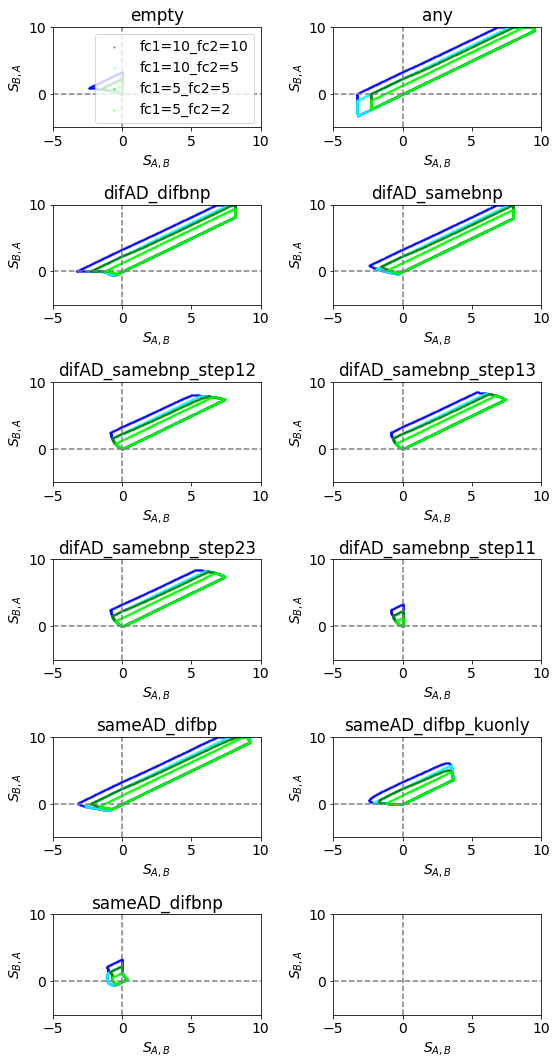

In [5]:
    
colors=["lime","green","cyan","blue"]
fig,axes=plt.subplots(6,2,figsize=(8,15))  
for cnum,case in enumerate(allcases):
    plist=allpoints[case]
    
    ax=axes[cnum//2][cnum%2]
    ax.set_title(case)
    for d,points in enumerate(plist[::-1]):
        ax.scatter([x[0] for x in points],[x[1] for x in points],label=fccases[::-1][d],s=1,color=colors[::-1][d],alpha=0.5)
    if cnum==0:
        ax.legend(loc="upper right",ncol=1)
for ax in axes.flatten():
    ax.set_xlabel(r"$S_{A,B}$") #,usetex=True)
    ax.set_ylabel(r"$S_{B,A}$") #,usetex=True)
    ax.set_xlim(col_ar[0],col_ar[-1])
    ax.set_ylim(row_ar[0],row_ar[-1])
    #ax.set_title("fc1=50,fc2=10")
    #ax.legend(loc='upper left',bbox_to_anchor=(0,-0.25),ncol=2)
    ax.axhline(y=0,linestyle='--',color='gray')
    ax.axvline(x=0,linestyle='--',color='gray')
plt.tight_layout()
plt.show()

Prepare matrices to continue. It would seem as if the ones with no straight boundaries could be extended further. 

In [78]:
def return_fullparset(parset,case):
    if case=="any":
        parset2=parset.copy()
    elif case=="difAD_difbnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[14:16],parset[14:16],parset[14:16]))
    elif case=="difADsbnp" or case=="difAD_samebnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
    elif case=="difAD_samebnp_step12":#ni,ia
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step13": #ni,an
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step23":#ia,an
        parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step11":
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="sameAD_difbp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
    elif case=="sameAD_difbp_kuonly":
        kb=parset[8]
        ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
    elif case=="sameAD_difbnp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
    elif case=="empty":
         parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return parset2

def return_fullparset_rev(parset,case):
    if case=="any":
        parset2=parset.copy()
    elif case=="difAD_difbnp":
        #parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[14:16],parset[14:16],parset[14:16]))
        parset2=np.concatenate((parset[0:14],parset[18:20]))
    elif case=="difADsbnp" or case=="difAD_samebnp":
        #parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
        parset2=parset[0:14].copy()
    elif case=="difAD_samebnp_step12":#ni,ia
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
        parset2=np.concatenate((parset[0:4],parset[7:9],parset[12:14]))
    elif case=="difAD_samebnp_step13": #ni,an
        parset2=np.concatenate((parset[0:4],parset[7:8],parset[9:10],parset[12:14]))
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step23":#ia,an
        #parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
        parset2=np.concatenate((parset[0:5],parset[9:10],parset[12:14]))
    elif case=="difAD_samebnp_step11":
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
        parset2=np.concatenate((parset[0:4],parset[7:8],parset[11:14]))
    elif case=="sameAD_difbp":
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
        parset2=np.concatenate((parset[0:8],parset[12:]))
    elif case=="sameAD_difbp_kuonly":
        #kb=parset[8]
        #ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        #bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        #parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
        ku1,ku2,ku3,ku4,ku5,ku6=parset[13::2]
        parset2=np.concatenate((parset[0:8],parset[12:13],np.array([ku1,ku2,ku3,ku4,ku5,ku6])))
    elif case=="sameAD_difbnp":
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
        parset2=np.concatenate((parset[0:8],parset[12:14],parset[18:20]))
    elif case=="empty":
         #parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
        parset2=np.concatenate((parset[0:8],parset[12:14]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return parset2

def get_constraints_npars(case,fcd=0.01,fcu=100):
    if case=="any":
        npars=24
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
        
    elif case=="difAD_difbnp":
        npars=16
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
    elif case=="difADsbnp" or case=="difAD_samebnp":
        npars=14
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
    elif case=="difAD_samebnp_step12":#ni,ia
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':0,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step13": #ni,an
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step23":#ia,an
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu}}
        npars=8
        #parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step11":
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="sameAD_difbp":
        npars=20
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
    elif case=="sameAD_difbp_kuonly":
        #kb=parset[8]
        #ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        #bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        #parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
        npars=15
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
    elif case=="sameAD_difbnp":
        npars=12
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
    elif case=="empty":
        npars=10
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}} 
        #parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return [constraints,npars]

Check that the reversing code works:

In [79]:
np.random.seed(1)
for case in allcases:
    df=pd.read_pickle("2020_03_15_kPolconstr1000_%s.df"%case)
    rows=np.random.choice(np.arange(len(df)),size=1000)
    for r in rows:
        row=df.iloc[r].values[0:24]
        parset_short=return_fullparset_rev(row,case)
        parset_long=return_fullparset(parset_short,case)
        dif=np.abs(parset_long-row)
        if np.any(dif>0.000000001):
            if "step" in case: #it means A and B changed
                row_=np.concatenate((row[0:4],row[8:12],row[4:8],row[12:]))
                parset_short=return_fullparset_rev(row_,case)
                parset_long=return_fullparset(parset_short,case)
                dif=np.abs(parset_long-row_)
                if np.any(dif>0.000000001):
                    print(case)
                    #print(np.where(dif>0.00000001))
                    #print(parset_short)
                    #for i_,i in enumerate(list(zip(row,parset_long))):
                    #    print(i_,i)
                    #print(parset_short)
                    #print(parset_long)
            else:
                print(case)
        

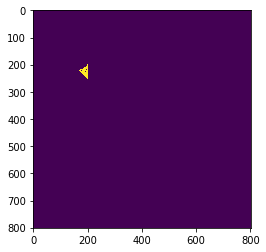

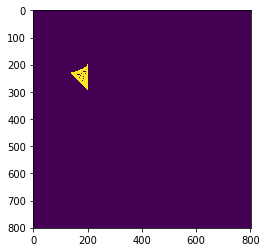

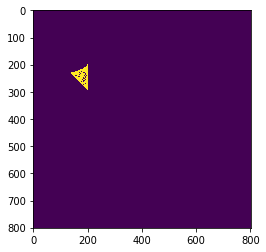

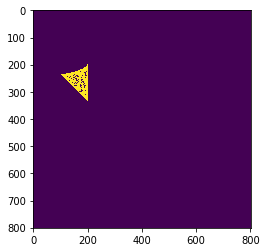

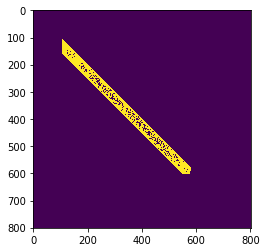

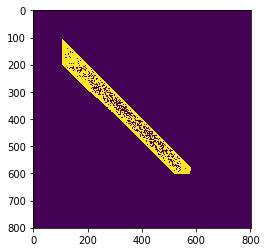

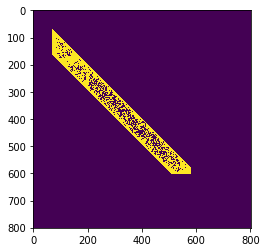

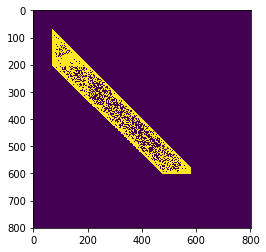

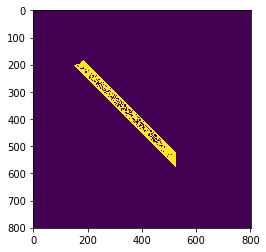

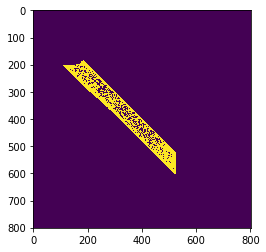

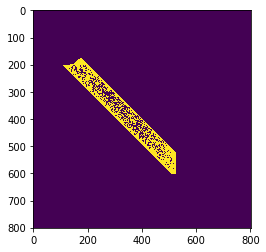

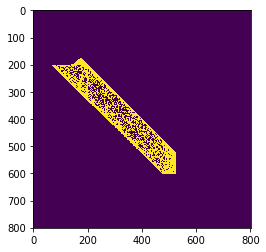

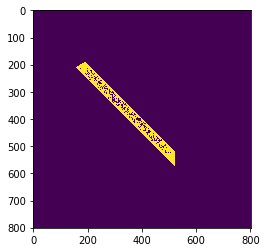

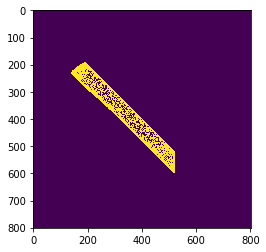

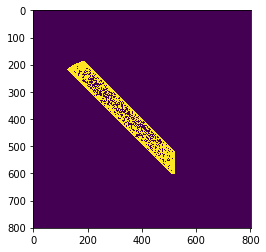

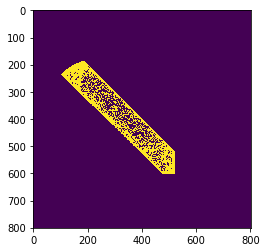

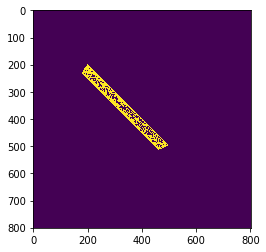

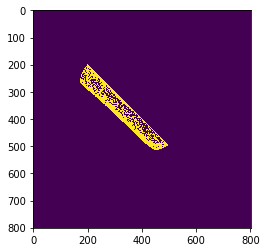

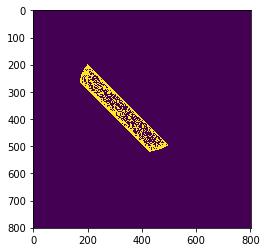

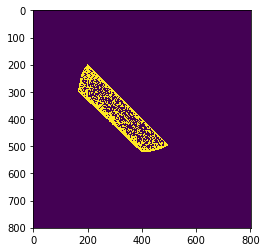

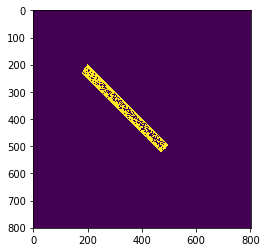

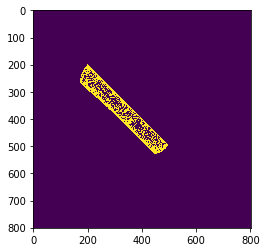

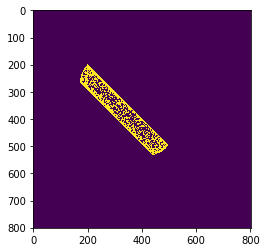

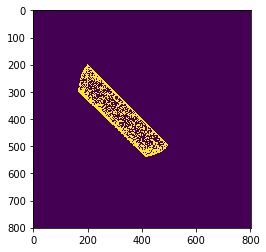

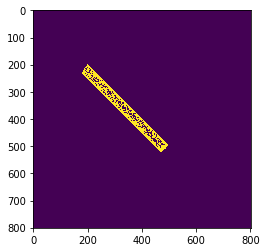

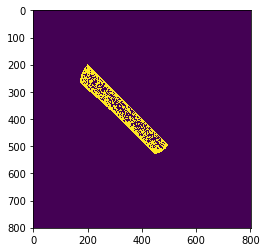

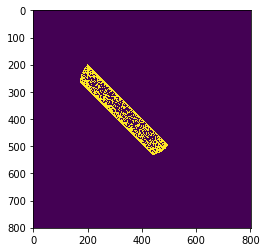

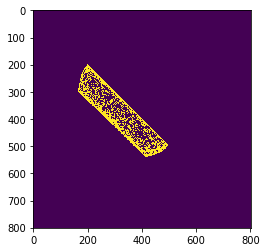

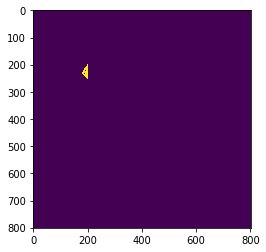

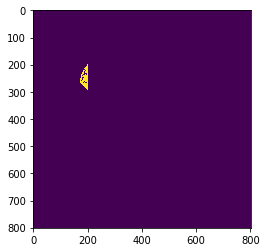

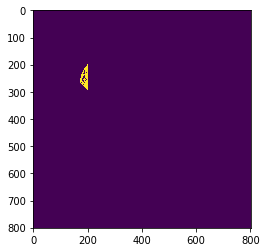

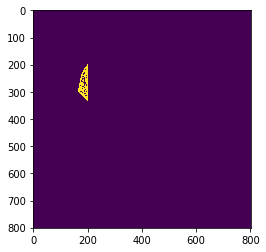

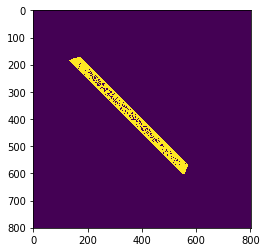

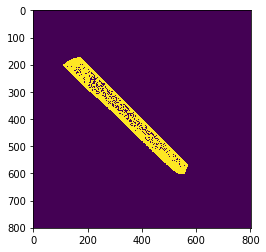

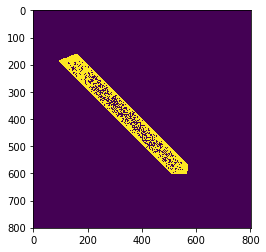

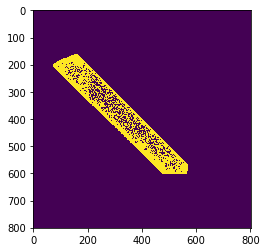

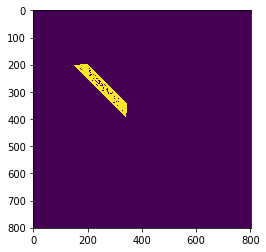

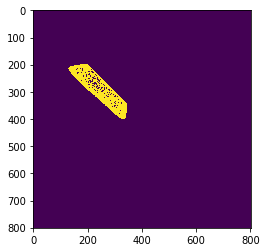

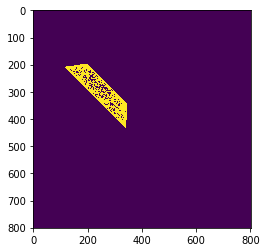

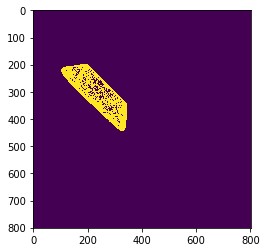

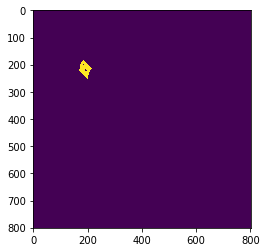

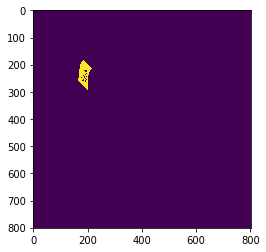

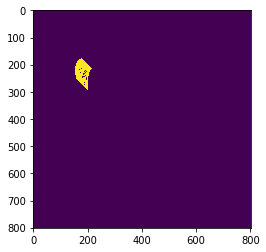

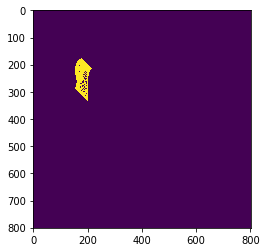

In [82]:
step=0.025
newcol_ar=np.arange(-5,15+step,step)
newrow_ar=np.arange(-5,15+step,step)
for case in allcases:
    np.random.seed(1)
    df=pd.read_pickle("2020_03_15_kPolconstr1000_%s.df"%case)
    allpoints[case]=[]
    constr,npars=get_constraints_npars(case)
    for d,fc in enumerate(fccases):
        subdf=df[df["fc1fc2"]==fc]
        
        SBA=subdf["SBA"].values
        SAB=subdf["SAB"].values
        parameters_all=subdf.values[:,0:24]
        mat=np.zeros((len(newrow_ar),len(newcol_ar)))
        matpars=np.zeros((len(newrow_ar),len(newcol_ar),npars))
        nr=np.arange(len(subdf))
        np.random.shuffle(nr)
        for r in nr:
            rowv=SBA[r]
            colv=SAB[r]
            idxr=np.where(newrow_ar>=rowv)[0][0]
            idxc=np.where(newcol_ar>=colv)[0][0]
            parset=parameters_all[r]
            short_p=return_fullparset_rev(parset,case)
            mat[idxr,idxc]=1
            matpars[idxr,idxc]=short_p
            
        plt.imshow(mat)
        plt.show()
        np.save("2020_03_15_mats_kPolconstr1000_tocontinue/mat_%s_%s.npy"%(case,fc),mat)
        np.save("2020_03_15_mats_kPolconstr1000_tocontinue/mat_pars_%s_%s.npy"%(case,fc),matpars)

In [83]:
dict_={"a":1,"b":2}
dict_.update({"c":3,"d":4})


In [84]:
dict_

{'a': 1, 'b': 2, 'c': 3, 'd': 4}